In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/permutations'

import flotilla
study = flotilla.embark('singlecell_pnm_figure4_voyages', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

2016-02-10 09:15:03	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-02-10 09:15:03	Parsing datapackage to create a Study object
2016-02-10 09:15:47	Initializing Study
2016-02-10 09:15:47	Initializing Predictor configuration manager for Study
2016-02-10 09:15:47	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-10 09:15:47	Added ExtraTreesClassifier to default predictors
2016-02-10 09:15:47	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-10 09:15:47	Added ExtraTreesRegressor to default predictors
2016-02-10 09:15:47	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-10 09:15:47	Added GradientBoostingClassifier to default predictors
2016-02-10 09:15:47	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gra

/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


In [4]:
! mkdir $folder

In [5]:
import glob
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks', context='paper')


In [6]:
from astrolabe import Waypoints
ws = Waypoints()


In [7]:
psi_folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/permutations/psi'

dfs = []

for csv in sorted(glob.glob('{}/*.csv'.format(psi_folder))):
    psi = pd.read_csv(csv, index_col=0)
    df = psi.groupby(study.sample_id_to_phenotype).apply(
        lambda x: ws.fit_transform(x.dropna(how='all', axis=1)))
    df['iteration'] = int(os.path.basename(csv).split('.')[0].split('_')[1])
    df = df.reset_index()
    dfs.append(df)
    
waypoints = pd.concat(dfs, ignore_index=True)
# sizes.columns = 

In [12]:
waypoints.head()

,phenotype,level_1,0,1,iteration
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,0.000000,1.000000,1
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.166667,0.750000,1
2,MN,exon:chr10:101507014-101507147:+@exon:chr10:10...,0.222222,0.777778,1
3,MN,exon:chr10:101997779-101997988:-@exon:chr10:10...,0.428572,0.571429,1
4,MN,exon:chr10:102003455-102003529:-@exon:chr10:10...,0.153846,0.846154,1


In [13]:
waypoints = waypoints.rename(columns={'level_1': 'event_id'})
waypoints.head()

,phenotype,event_id,0,1,iteration
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,0.000000,1.000000,1
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,0.166667,0.750000,1
2,MN,exon:chr10:101507014-101507147:+@exon:chr10:10...,0.222222,0.777778,1
3,MN,exon:chr10:101997779-101997988:-@exon:chr10:10...,0.428572,0.571429,1
4,MN,exon:chr10:102003455-102003529:-@exon:chr10:10...,0.153846,0.846154,1


In [14]:
waypoints.to_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voyages/permuted_psi_waypoints.csv', index=False)

In [15]:
from astrolabe import waypointplot

In [17]:
waypoints_index = waypoints.set_index(['phenotype', 'event_id', 'iteration'])
waypoints_index.head()

0  \
phenotype event_id                                           iteration             
MN        exon:chr10:101165513-101165617:-@exon:chr10:101... 1          0.000000   
          exon:chr10:101480744-101480825:-@exon:chr10:101... 1          0.166667   
          exon:chr10:101507014-101507147:+@exon:chr10:101... 1          0.222222   
          exon:chr10:101997779-101997988:-@exon:chr10:101... 1          0.428572   
          exon:chr10:102003455-102003529:-@exon:chr10:101... 1          0.153846   

                                                                               1  
phenotype event_id                                           iteration            
MN        exon:chr10:101165513-101165617:-@exon:chr10:101... 1          1.000000  
          exon:chr10:101480744-101480825:-@exon:chr10:101... 1          0.750000  
          exon:chr10:101507014-101507147:+@exon:chr10:101... 1          0.777778  
          exon:chr10:101997779-101997988:-@exon:chr10:101... 1          0.571429  
          exon:chr10:102003455-102003529:-@exon:chr10:101... 1          0.846154

In [19]:
folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/permutations'

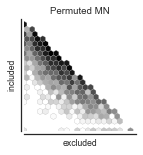

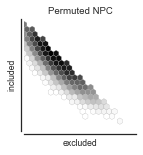

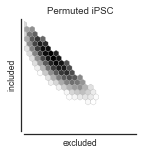

In [20]:
for phenotype, phenotype_waypoints in waypoints_index.groupby(level=0):
    fig, ax = plt.subplots(figsize=(2, 2))
    waypointplot(phenotype_waypoints)
    ax.set_title('Permuted {}'.format(phenotype))
    fig.savefig('{}/waypoints_{}.pdf'.format(folder, phenotype))